# <center>Лабораторная работа №1<center>

Выполнила студентка группы 8О-407Б \
Бондарь Ксения

## <center>Первый dataset<center>

Источник: сайт [Kaggle](https://www.kaggle.com/) \
Ссылка на датасет: https://www.kaggle.com/denisadutca/customer-behaviour

## Описание

Датасет представляет из себя данные о 400 клиентах компании по следующими признаками: уникальный идентификатор, пол, возраст клиента и зарплата. Кроме того, есть признак Purchased - который, в зависимости от того, решил клиент купить конкретный товар или нет, принимает значений 1 и 0 соответственно. \
\
Признак *Purchased* является целевым. Будем предсказывать, купит ли клиент новый продукт.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

Импортируем датасет и посмотрим содержимое:

In [2]:
data = pd.read_csv('data/Customer_Behaviour.csv', index_col='User ID')
data.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [3]:
data.tail()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1
15755018,Male,36,33000,0
15594041,Female,49,36000,1


Размер таблицы:

In [4]:
data.shape

(400, 4)

Посмотрим на содержимое датасета:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


Можно увидеть, что пропущенных значений у нас нет. Однако, есть категориальный признак (тип object), необходимо его перекодировать.

Посмотрим на некоторую сводную информацию по всей таблице и по всем признакам:

In [6]:
data.describe(include='all')

,Gender,Age,EstimatedSalary,Purchased
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


Закодируем категориальные признаки. Признак *Gender* принимает значения *Male* и *Female*, что удобно преобразовать в классические, для бинарной классификации, значения 0 и 1 для мужчин и женщин соответственно. 

In [7]:
data.loc[data.Gender == 'Male', 'Gender'] = 0
data.loc[data.Gender == 'Female', 'Gender'] = 1
data.Gender = data.Gender.astype('int64')

Отобразим:

In [8]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,0,19,19000,0
15810944,0,35,20000,0
15668575,1,26,43000,0
15603246,1,27,57000,0
15804002,0,19,76000,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 15.6 KB


## Визуализация и анализ данных

In [10]:
data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Построим для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

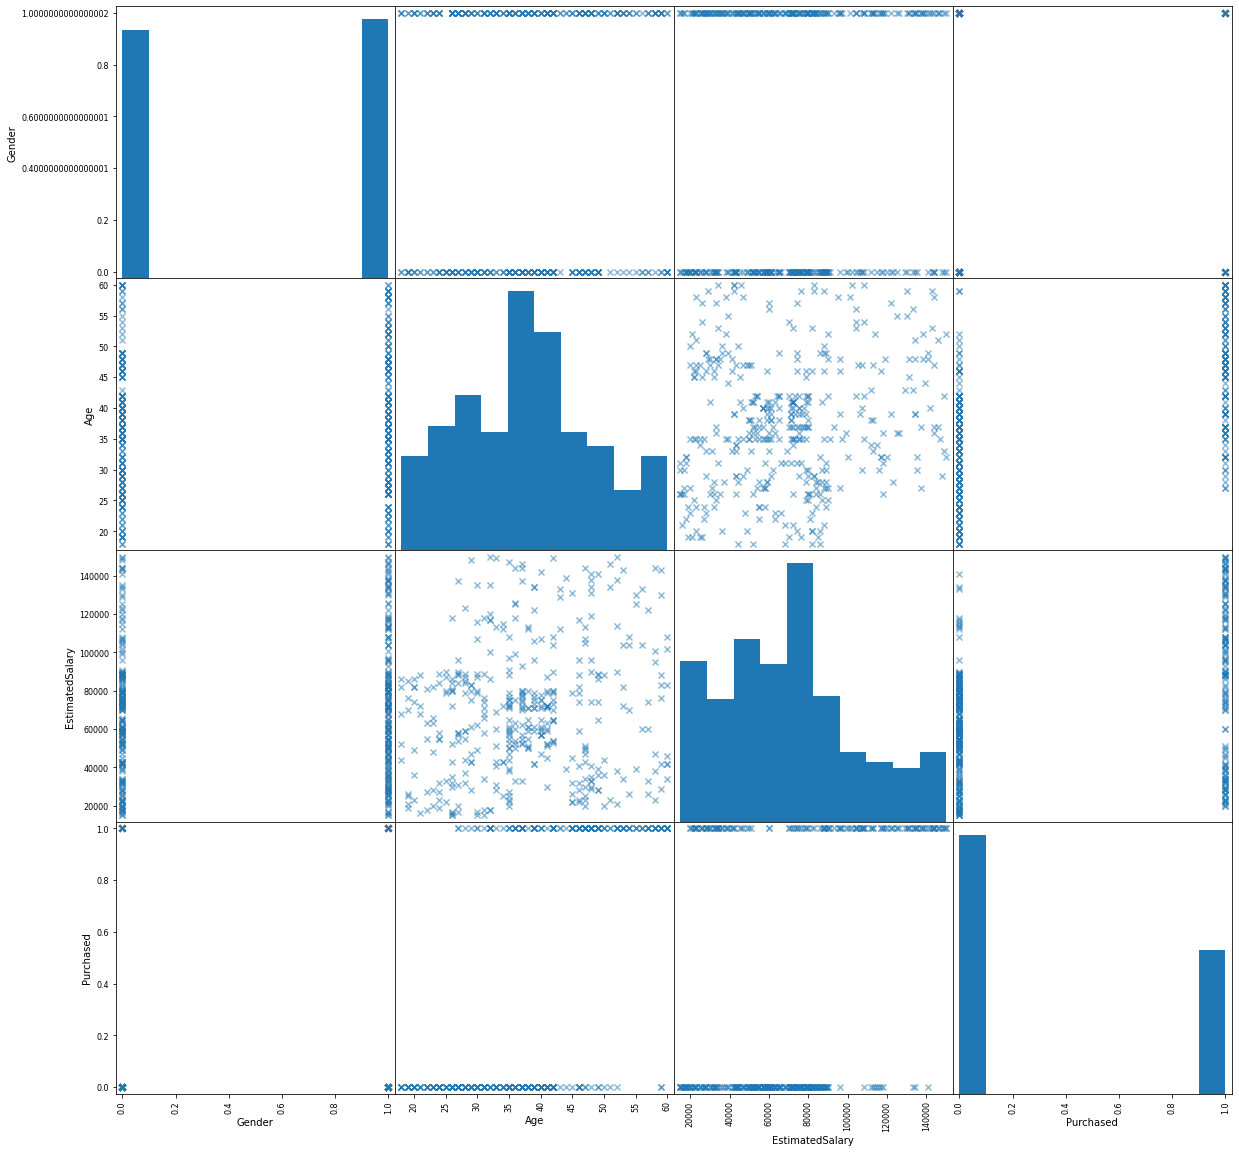

In [11]:
scatter_matrix(data, figsize=(20, 20), marker='x');

На этом этапе видна некоторая корреляционная зависимость. Например, люди старшего возраста охотнее покупают новый продукт, чем люди помладше. А вот пол человека почти не имеет корреляционной зависимости с возможностью покупки товара. Можем также в этом убедиться, посмотрев на значения корреляционной зависимости для *Purchased*: 

In [12]:
data.corr()['Purchased'].sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender             0.042469
Name: Purchased, dtype: float64

Построим гистограммы распределения для кадого признака:

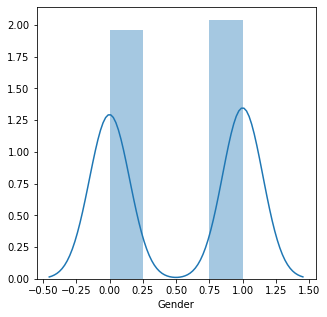

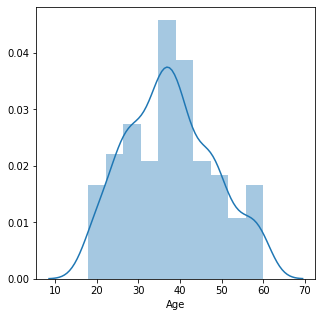

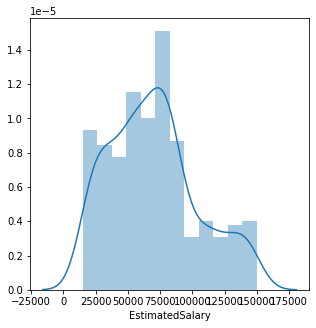

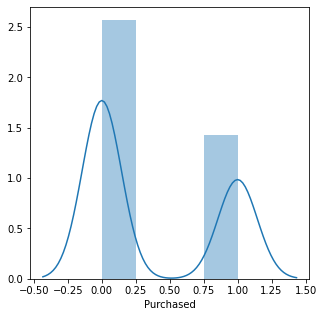

In [13]:
num = [i for i in data.columns]
for i in range(len(num)):
    fig = plt.subplots(figsize=(5, 5))
    sns_plot = sns.distplot(data[num[i]])

Нормализуем данные. Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [14]:
data_normalized = (data - data.mean()) / data.std()
data_normalized.describe()

,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-4.440892e-17,-1.421085e-16,3.552714e-17,3.552714e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.018928e+00,-1.874962e+00,-1.605495e+00,-7.450028e-01
25%,-1.018928e+00,-7.540869e-01,-7.843075e-01,-7.450028e-01
50%,9.789700e-01,-6.248285e-02,7.551993e-03,-7.450028e-01
75%,9.789700e-01,7.960601e-01,5.354583e-01,1.338921e+00
max,9.789700e-01,2.131571e+00,2.353802e+00,1.338921e+00


### Вывод
Я выбрала достаточно маленький датасет с маленьким количеством признаков, которые не сильно влияют на покупку товара. Вряд ли этот датасет можно использовать в реальной жизни. Хорошо было бы иметь данные, которые отражают интересы покупателей и их образ жизни, ведь это часто влияет на потребность в конкретном товаре. Данный пример показал, как важно иметь большое количество объектов и признаков для адекватного анализа и дальнейшего обучения моделей.